In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import pymc3 as pm
import theano
import theano.tensor as T

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import skew, kurtosis
from sklearn.preprocessing import scale

%matplotlib inline
plt.style.use('seaborn')

1 #define _CUDA_NDARRAY_C
2 
3 #include <Python.h>
4 #include <structmember.h>
5 #include "theano_mod_helper.h"
6 
7 #include <numpy/arrayobject.h>
8 #include <iostream>
9 
10 #include "cuda_ndarray.cuh"
11 
12 #ifndef CNMEM_DLLEXPORT
13 #define CNMEM_DLLEXPORT
14 #endif
15 
16 #include "cnmem.h"
17 #include "cnmem.cpp"
18 
19 //If true, when there is a gpu malloc or free error, we print the size of allocated memory on the device.
20 #define COMPUTE_GPU_MEM_USED 0
21 
22 //If true, we fill with NAN allocated device memory.
23 #define ALLOC_MEMSET 0
24 
25 //If true, we print out when we free a device pointer, uninitialize a
26 //CudaNdarray, or allocate a device pointer
27 #define PRINT_FREE_MALLOC 0
28 
29 //If true, we do error checking at the start of functions, to make sure there
30 //is not a pre-existing error when the function is called.
31 //You probably need to set the environment variable
32 //CUDA_LAUNCH_BLOCKING=1, and/or modify the CNDA_THREAD_SYNC
33 //preprocessor macro 

815         if (NULL == rval)
816         {
817             Py_DECREF(selfkey);
818             return NULL;
819         }
820         if (PyDict_SetItem(memo, selfkey, rval))
821         {
822             Py_DECREF(rval);
823             Py_DECREF(selfkey);
824             return NULL;
825         }
826         Py_DECREF(selfkey);
827         return rval;
828     }
829 }
830 PyObject * CudaNdarray_ReduceSum(CudaNdarray * self, PyObject * py_reduce_mask)
831 {
832     if (!PySequence_Check(py_reduce_mask))
833     {
834         PyErr_SetString(PyExc_TypeError, "reduce_mask must be sequence of ints");
835         return NULL;
836     }
837     int len = PySequence_Length(py_reduce_mask);
838     if (len != self->nd)
839     {
840         PyErr_SetString(PyExc_TypeError, "length of reduce_mask must match self->nd");
841         return NULL;
842     }
843     CudaNdarray * self_sum = (CudaNdarray*)CudaNdarray_New();
844     if (!self_sum)
845     {
846         return NULL;
847     }
848  

2015                         PyErr_Format(
2016                             PyExc_RuntimeError,
2017                             "CudaNdarray_inplace_elemwise case5: Cuda error: %s: %s. n_block=(%ld,%ld) n_threads=%ld\n",
2018                             "k5 with loop over k4",
2019                             cudaGetErrorString(err),
2020                             (long) n_blocks.x, (long) n_blocks.y, (long) n_threads.x);
2021                         Py_XDECREF(new_other);
2022                         return -1;
2023                     }
2024                 }
2025             }
2026             break;
2027         case 6:
2028             {
2029                 dim3 n_blocks(
2030                         std::min(
2031                             CudaNdarray_HOST_DIMS(self)[0],
2032                             NUM_VECTOR_OP_BLOCKS),
2033                         CudaNdarray_HOST_DIMS(self)[1],
2034                         CudaNdarray_HOST_DIMS(self)[2]
2035                         

3248             if (cnmem > .95){
3249                 cnmem = .95;
3250             }
3251             size_t free = 0, total = 0;
3252             cudaError_t err = cudaMemGetInfo(&free, &total);
3253             if (err != cudaSuccess){
3254                 // Clear the error flag, cudaMemGetInfo doesn't do it.
3255                 // Currently this returns the same thing as err, but if in future
3256                 // it returns something else I still don't see why we should ignore
3257                 // it.  All we want to do here is reset the flag.
3258                 cudaGetLastError();
3259                 PyErr_Format(PyExc_RuntimeError,
3260                              "Error while getting memory info about the gpu: %s",
3261                              cudaGetErrorString(err));
3262                 return NULL;
3263             }
3264             mem = total * cnmem;
3265         }
3266         if(initCnmem(card_number_provided, card_nb, mem) == -1){
3267             r

4616     // z_str[0], ... z_str[nd-1]
4617     extern __shared__ int structure_data[];
4618     for (unsigned int i = threadIdx.x; i < nd; i += blockDim.x)
4619     {
4620         structure_data[i+0*nd] = dims_a[i];
4621         structure_data[i+1*nd] = log2_dims_a[i];
4622         structure_data[i+2*nd] = a_str[i];
4623         structure_data[i+3*nd] = z_str[i];
4624     }
4625     dims_a = structure_data;
4626     log2_dims_a = structure_data + nd;
4627     a_str = structure_data + 2*nd;
4628     z_str = structure_data + 3*nd;
4629 
4630     __syncthreads(); //wait for all the shared structure to be loaded
4631 
4632     for (unsigned int i = idx; i < size_z; i += numThreads)
4633     {
4634         unsigned int ii = i;
4635         const float * a_data_i = a_data;
4636         float * z_data_i = z_data;
4637         unsigned int n_reduce_elements = 1;
4638         unsigned int n_reduce_dims = 0;
4639         unsigned int reduce_dim0 = nd-1;
4640 
4641 
4642         //In this loop, w

nvcc warning : The 'compute_20', 'sm_20', and 'sm_21' architectures are deprecated, and may be removed in a future release (Use -Wno-deprecated-gpu-targets to suppress warning).
nvcc fatal   : Cannot find compiler 'cl.exe' in PATH

['nvcc', '-shared', '-O3', '-Xlinker', '/DEBUG', '-D HAVE_ROUND', '-m64', '-Xcompiler', '-DCUDA_NDARRAY_CUH=mc72d035fdf91890f3b36710688069b2e,-DNPY_NO_DEPRECATED_API=NPY_1_7_API_VERSION,/Zi,/MD', '-I"C:\\Users\\aresf\\Anaconda3\\envs\\py36\\lib\\site-packages\\theano\\sandbox\\cuda"', '-I"C:\\Users\\aresf\\Anaconda3\\envs\\py36\\lib\\site-packages\\numpy\\core\\include"', '-I"C:\\Users\\aresf\\Anaconda3\\envs\\py36\\include"', '-I"C:\\Users\\aresf\\Anaconda3\\envs\\py36\\lib\\site-packages\\theano\\gof"', '-L"C:\\Users\\aresf\\Anaconda3\\envs\\py36\\libs"', '-L"C:\\Users\\aresf\\Anaconda3\\envs\\py36"', '-o', 'C:\\Users\\aresf\\AppData\\Local\\Theano\\compiledir_Windows-10-10.0.16299-SP0-Intel64_Family_6_Model_142_Stepping_9_GenuineIntel-3.6.3-64\\cuda_ndarr

In [2]:
train_data = pd.read_csv('train.csv')
# Isolate and log-transform all numeric data
numeric_data = train_data.dtypes[train_data.dtypes != 'object'].index
skewed = train_data[numeric_data].apply(lambda x: skew(x.dropna()))
skewed = skewed[skewed > 0.2].index
train_data[skewed] = np.log1p(train_data[skewed])
# Apparently this gets "dummy data" for categorical data
train_data = pd.get_dummies(train_data) # this is pretty sick
# fill nansies
train_data = train_data.fillna(train_data.mean())
train_data.reset_index(inplace=True)

X_train = (train_data.drop('SalePrice', axis=1))
X_train = scale(X_train)
prices = np.asarray(train_data['SalePrice'])
N = X_train.shape[0] # number of data points
D = X_train.shape[1] # number of features

In [25]:
with pm.Model() as hierarchical_model:
    # Hyperpriors
    mu_a = pm.Normal('mu_alpha', mu=0., sd=1)
    sigma_a = pm.HalfCauchy('sigma_alpha', beta=1)
    mu_b = pm.Normal('mu_beta', mu=0., sd=1)
    sigma_b = pm.HalfCauchy('sigma_beta', beta=1)
    
    # Intercept for each county, distributed around group mean mu_a
    a = pm.Normal('alpha', mu=mu_a, sd=sigma_a, shape=[1])
                  # Intercept for each county, distributed around group mean mu_a
    b = pm.Normal('beta', mu=mu_b, sd=sigma_b, shape=[D,1])
    
    # Model error
    eps = pm.HalfCauchy('eps', beta=1)
    
    # Expected value
    m_y = a + T.dot(X_train,b)
#     radon_est = a[county_idx] + b[county_idx] * data.floor.values
    
    # Data likelihood
#     y_like = pm.Normal('y_like', mu=radon_est, sd=eps, observed=data.log_radon)
    y_like = pm.Normal('y_like', mu=m_y, sd=eps, observed=prices)

In [ ]:
with hierarchical_model:
    hierarchical_trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 33%|██████████████████████▌                                             | 332/1000 [51:20<1:43:18,  9.28s/it]

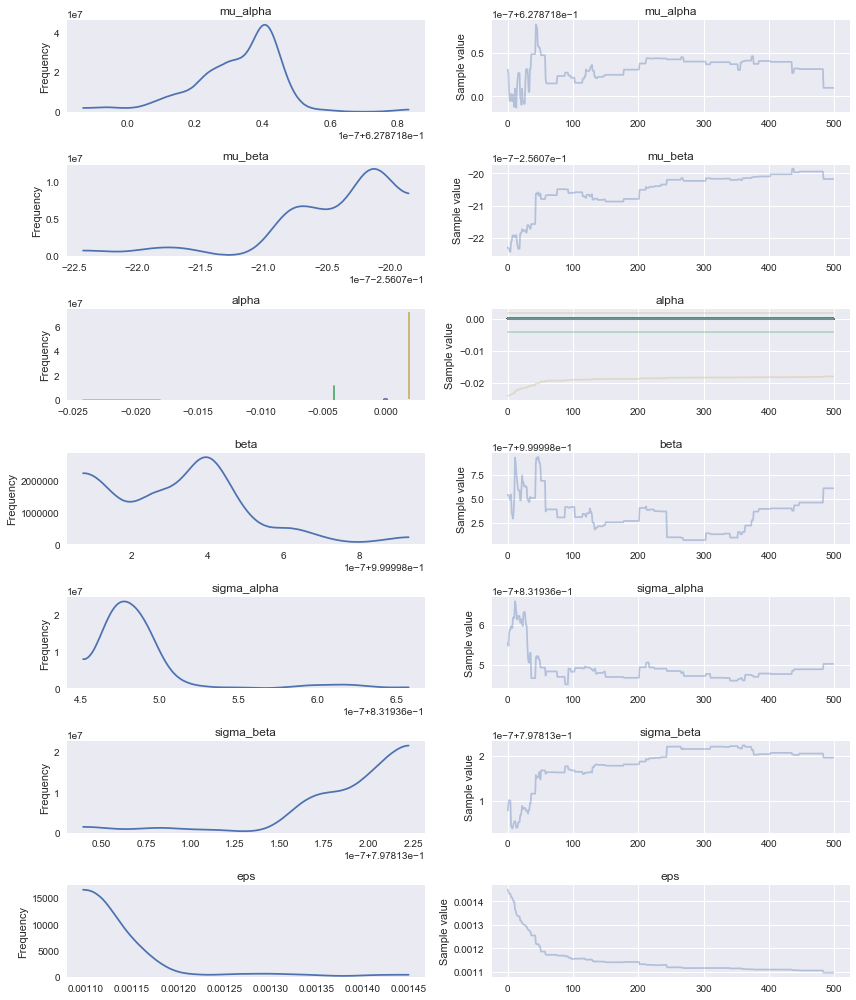

In [5]:
pm.traceplot(hierarchical_trace);

In [20]:
X_train.shape

(1460, 290)

In [22]:
prices.shape

(1460,)